# Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leemos el dataset

In [2]:
df = pd.read_csv('../data/train.csv')

In [3]:
writer = pd.ExcelWriter('train.xlsx', engine='xlsxwriter')

df.to_excel(writer, sheet_name='Sheet1')

writer.save()

KeyboardInterrupt: 

# Análisis

Primero podemos usar .info para tener una idea general del dataset

In [3]:
df.info()
print(df.sort_values(by=['fecha'])["fecha"])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          240000 non-null  int64  
 1   titulo                      234613 non-null  object 
 2   descripcion                 238381 non-null  object 
 3   tipodepropiedad             239954 non-null  object 
 4   direccion                   186928 non-null  object 
 5   ciudad                      239628 non-null  object 
 6   provincia                   239845 non-null  object 
 7   antiguedad                  196445 non-null  float64
 8   habitaciones                217529 non-null  float64
 9   garages                     202235 non-null  float64
 10  banos                       213779 non-null  float64
 11  metroscubiertos             222600 non-null  float64
 12  metrostotales               188533 non-null  float64
 13  idzona        

Con value_counts() podemos ver la distribución de valores que toma una columna en particular

In [26]:
df['tipodepropiedad'].value_counts()

Casa                             141717
Apartamento                       57341
Casa en condominio                19297
Terreno                            9945
Local Comercial                    3055
Oficina comercial                  1741
Bodega comercial                   1406
Edificio                           1396
Terreno comercial                  1326
Casa uso de suelo                   708
Quinta Vacacional                   395
Duplex                              343
Villa                               340
Inmuebles productivos urbanos       200
Rancho                              170
Local en centro comercial           165
Departamento Compartido             141
Otros                               134
Nave industrial                      76
Terreno industrial                   31
Huerta                               20
Lote                                  5
Hospedaje                             1
Garage                                1
Name: tipodepropiedad, dtype: int64

In [32]:
df['ciudad'].value_counts()

print(len(df))

umbral = 500
category = 'ciudad'
df2 = df.groupby(category).filter(lambda x: len(x) > umbral)
print(len(df2))

df_casa = df[df["tipodepropiedad"] == "Casa"]

df2['ciudad'].value_counts()
df_casa

240000
218821


,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,48551.0,NaN,NaN,2015-10-17 00:00:00,0.0,0.0,0.0,0.0,0.0,1200000.0
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,53666.0,19.301890,-99.688015,2012-03-09 00:00:00,0.0,0.0,0.0,1.0,1.0,650000.0
6,139233,de oportunidad casa en san lorenzo,"ubicada en esquina, pertenece san lorenzo agen...",Casa,NaN,Oaxaca de Juárez,Oaxaca,NaN,3.0,1.0,...,73510.0,17.143504,-96.803504,2016-02-23 00:00:00,0.0,0.0,0.0,0.0,0.0,1150000.0
7,5013,casa emilia en venta en selvamar playa del carmen,casa emilia en venta playa del carmenfracciona...,Casa,condominio el trebol,Playa del Carmen,Quintana Roo,2.0,4.0,2.0,...,130510.0,20.672612,-87.037968,2016-10-20 00:00:00,0.0,0.0,0.0,0.0,0.0,4200000.0
10,51180,mi 2° credito,<p>mi 2&deg; credito<br />para todos aquellos ...,Casa,MI 2° CREDITO,San Luis Potosí,San luis Potosí,0.0,3.0,1.0,...,87542.0,22.195878,-101.018956,2013-01-03 00:00:00,0.0,0.0,0.0,1.0,1.0,488000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239993,207892,bugambilias (ciudad),coto privado de tan solo 7 casas donde cada fa...,Casa,Paseo de la Cañada,Zapopan,Jalisco,1.0,3.0,2.0,...,48046.0,20.615574,-103.456215,2015-03-22 00:00:00,0.0,0.0,0.0,0.0,0.0,1650000.0
239994,110268,hermosa casa en villa de los belenes,"<p>moderna casa 3 pisos, muro llor&oacute;n , ...",Casa,"MANUEL AMAYA,ENTRE SEBASTIAN ALLENDE Y AMADO A...",Zapopan,Jalisco,3.0,2.0,2.0,...,48029.0,20.604484,-103.450049,2013-07-31 00:00:00,0.0,0.0,0.0,0.0,0.0,1350000.0
239995,119879,bonita casas de 2 recamaras a 10 minutos del c...,vendo casa en bosques de ica residencial a 10 ...,Casa,BOSQUES,Zinacantepec,Edo. de México,0.0,2.0,2.0,...,53666.0,NaN,NaN,2015-02-08 00:00:00,0.0,0.0,0.0,0.0,0.0,650000.0
239996,259178,casa en condominio a 10 min. del centro de toluca,"casa con un jardin amplio, un cuarto de servic...",Casa,Filiberto Navas 325,Toluca,Edo. de México,0.0,3.0,3.0,...,51954.0,19.294665,-99.692916,2014-07-10 00:00:00,0.0,0.0,0.0,1.0,1.0,1940000.0


In [6]:
df['ciudad'].value_counts()

Querétaro          12646
Benito Juárez      11014
Zapopan            10360
San Luis Potosí     7925
Mérida              7162
                   ...  
Sabinas                1
Tepechitlán            1
Dzoncauich             1
Soto la Marina         1
Tlalixcoyan            1
Name: ciudad, Length: 875, dtype: int64

In [7]:
for cat in ["piscina", "usosmultiples", "banos", "gimnasio", "escuelascercanas", "centroscomercialescercanos", "habitaciones", "garages", "banos"]:
    print("\nAnalicemos el caso de %s" %(cat))
    print(df[cat].value_counts())



Analicemos el caso de piscina
0.0    219028
1.0     20972
Name: piscina, dtype: int64

Analicemos el caso de usosmultiples
0.0    226778
1.0     13222
Name: usosmultiples, dtype: int64

Analicemos el caso de banos
2.0    87683
1.0    58173
3.0    49365
4.0    18558
Name: banos, dtype: int64

Analicemos el caso de gimnasio
0.0    225006
1.0     14994
Name: gimnasio, dtype: int64

Analicemos el caso de escuelascercanas
0.0    133406
1.0    106594
Name: escuelascercanas, dtype: int64

Analicemos el caso de centroscomercialescercanos
0.0    144832
1.0     95168
Name: centroscomercialescercanos, dtype: int64

Analicemos el caso de habitaciones
3.0     121887
2.0      57808
4.0      25068
1.0       5069
5.0       4596
6.0       1669
7.0        539
8.0        398
10.0       316
9.0        179
Name: habitaciones, dtype: int64

Analicemos el caso de garages
2.0    94167
1.0    59464
0.0    26926
3.0    21678
Name: garages, dtype: int64

Analicemos el caso de banos
2.0    87683
1.0    58173
3.0

Si la columna tiene un valor númerico puede ser interesante ver su histograma con la función hist()

/Users/ecerdeira/.pyenv/versions/3.6.6/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/ecerdeira/.pyenv/versions/3.6.6/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/ecerdeira/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


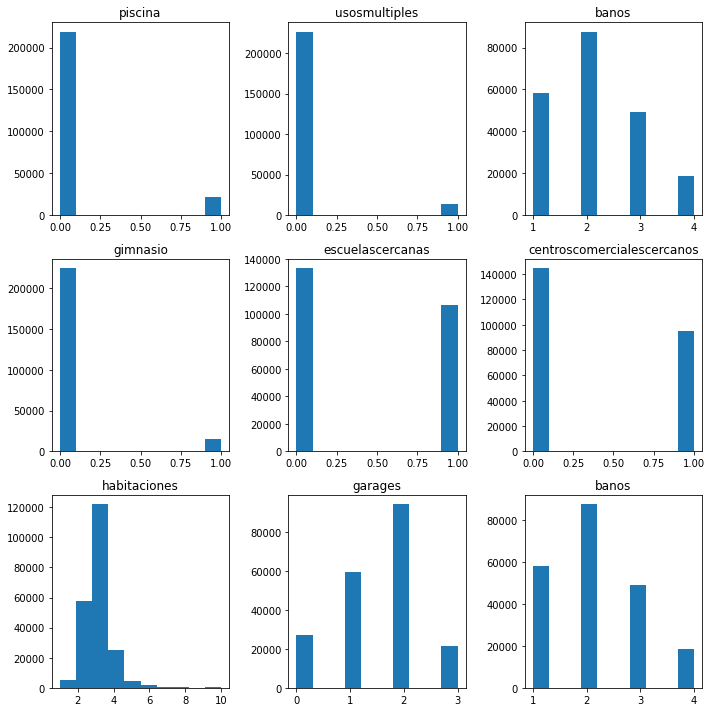

In [8]:
fig, axs = plt.subplots(3, 3, figsize=(10,10))

categories = ["piscina", "usosmultiples", "banos", "gimnasio", "escuelascercanas", "centroscomercialescercanos", "habitaciones", "garages", "banos"]
    
for i in range(len(categories)):
    axs[i//3, i%3].hist(df[categories[i]])
    axs[i//3, i%3].set_title(categories[i])
    
fig.tight_layout()
fig.show()

Otra posibilidad al ser valores numéricos es ver su distribución mediante la función describe(). Como parámetro acepta que le pasemos todos los percentiles que queremos ver.

In [9]:
df['metroscubiertos'].describe()

count    222600.000000
mean        174.016774
std          98.152950
min          15.000000
25%          90.000000
50%         153.000000
75%         240.000000
max         439.000000
Name: metroscubiertos, dtype: float64

En pandas es simple filtrar el dataset por el valor del alguna columna. 
Igualar una columna a un valor (df['ciudad']=='Mérida'), nos devuelve una serie de booleanos que sirven para indexar el dataset. También podemos filtrar filas en base a otros criterios, como tirar las que tienen valores "NaN" con la función dropna()

In [10]:
df['ciudad']=='Mérida'

0         False
1         False
2         False
3         False
4         False
          ...  
239995    False
239996    False
239997    False
239998    False
239999    False
Name: ciudad, Length: 240000, dtype: bool

In [44]:
print(len(df))
print(len(df_casa))
df_queretaro = df_casa[df_casa["ciudad"]=="Querétaro"].dropna()
print(len(df_queretaro))

240000
141717
1759


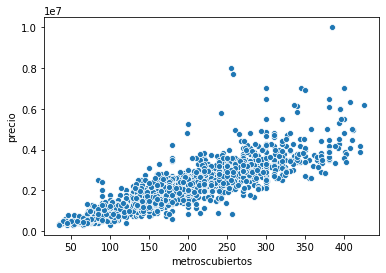

In [46]:
sns.scatterplot(data=df_queretaro, x="metroscubiertos", y="precio")

In [37]:
df_merida = df[df['ciudad']=='Mérida'].dropna()

Para ver la relación entre algunas variables puede ser útil realizar un primer gráfico. Pandas tiene sus funciones para graficar basadas en matplotlib. Existen otras librerías como Seaborn que, si bien también está basada sobre matplotlib, da algunas funcionalidades más.

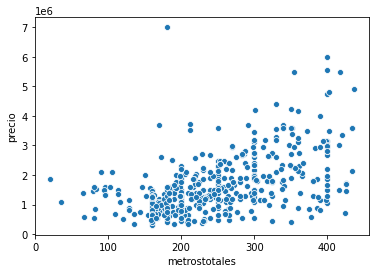

In [38]:
sns.scatterplot(data=df_merida, x='metrostotales', y='precio')


En pandas es muy simple agregar una nueva columna con un valor calculado a partir de las otras. Por ejemplo, nuestro inmuebles serán "copados para ejercitar" si tiene gimnasio y pileta.

In [11]:
df['copado para ejercitar'] = (df['piscina']>0) & (df['gimnasio']>0) 

In [12]:
df.columns

Index(['id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio', 'copado para ejercitar'],
      dtype='object')

In [13]:
df['copado para ejercitar'].value_counts()

False    232634
True       7366
Name: copado para ejercitar, dtype: int64

Más allá de que podemos segmentar utilizando filtros, a veces queremos realizar una acción para cada una de las segmentaciones posibles. Esto lo podemos lograr con la función groupby() que agrupa los valores y luego no deja aplicar una función sobre el grupo.

In [14]:
df.groupby('tipodepropiedad')['copado para ejercitar'].mean()

tipodepropiedad
Apartamento                      0.085890
Bodega comercial                 0.000000
Casa                             0.012581
Casa en condominio               0.032855
Casa uso de suelo                0.000000
Departamento Compartido          0.163121
Duplex                           0.000000
Edificio                         0.000000
Garage                           0.000000
Hospedaje                        0.000000
Huerta                           0.000000
Inmuebles productivos urbanos    0.000000
Local Comercial                  0.000000
Local en centro comercial        0.000000
Lote                             0.000000
Nave industrial                  0.000000
Oficina comercial                0.000574
Otros                            0.000000
Quinta Vacacional                0.000000
Rancho                           0.000000
Terreno                          0.000000
Terreno comercial                0.000000
Terreno industrial               0.000000
Villa             